# Myanmar Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
myan_df = lifeladder_df.loc[lifeladder_df['country'] == 'Myanmar']
myan_df['year'] = pd.to_datetime(myan_df['year'], format='%Y')
myan_df = pd.Series(myan_df['Life_Ladder'].values, index=myan_df.year, name='Life_Ladder')
myan_df.index = pd.DatetimeIndex(myan_df.index, 
                                      freq=myan_df.index.inferred_freq)

myan_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_12148\3696103188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myan_df['year'] = pd.to_datetime(myan_df['year'], format='%Y')


year
1990-01-01    4.267321
1991-01-01    4.653235
1992-01-01    4.463844
1993-01-01    4.414118
1994-01-01    4.626068
1995-01-01    4.420614
1996-01-01    4.724815
1997-01-01    4.647559
1998-01-01    4.474033
1999-01-01    4.566165
2000-01-01    4.716823
2001-01-01    4.227258
2002-01-01    4.459539
2003-01-01    4.443989
2004-01-01    4.449989
2005-01-01    4.212054
2006-01-01    4.332022
2007-01-01    4.181750
2008-01-01    4.533575
2009-01-01    4.360196
2010-01-01    4.459798
2011-01-01    4.492983
2012-01-01    4.438940
2013-01-01    4.175671
2014-01-01    4.786247
2015-01-01    4.223846
2016-01-01    4.623120
2017-01-01    4.513778
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
myan_list = myan_df.tolist()
myan_list

[4.267320554507203,
 4.653234988416263,
 4.463843535009878,
 4.4141184379255,
 4.626068342527787,
 4.420613578916544,
 4.724815469823922,
 4.647559096768807,
 4.474033156091873,
 4.566165251571211,
 4.716823218541148,
 4.227257850751216,
 4.459539374199723,
 4.443988685529047,
 4.449988689523805,
 4.212054117666865,
 4.332021873809429,
 4.181749814758065,
 4.533575021214186,
 4.360195550132962,
 4.459798313573547,
 4.492982726846759,
 4.438939571380615,
 4.175670623779297,
 4.786247253417969,
 4.223846435546875,
 4.623119831085205,
 4.513777659293189]

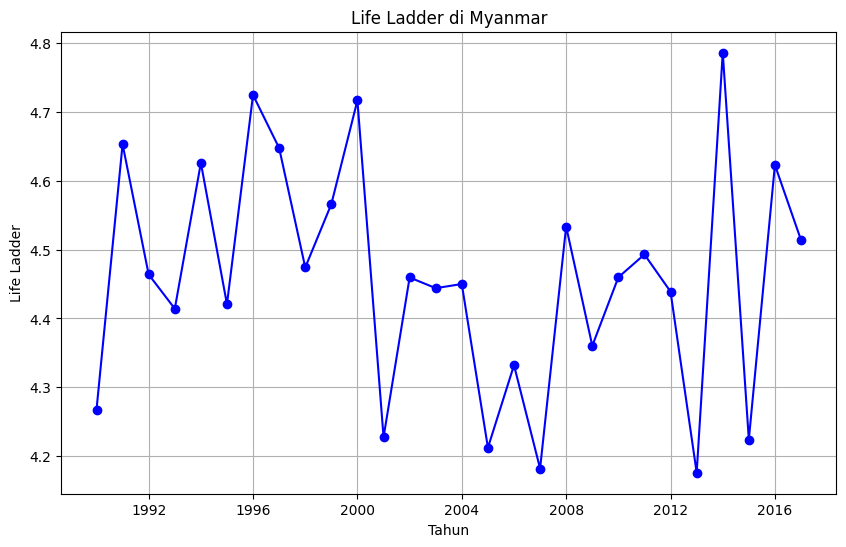

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(myan_df.index, myan_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Myanmar')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

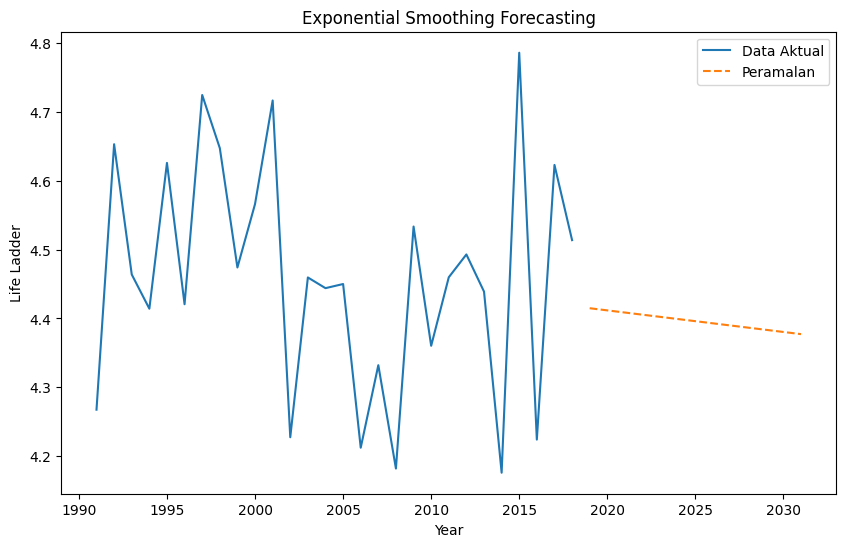

            forecast
2018-12-31  4.414813
2019-12-31  4.411674
2020-12-31  4.408535
2021-12-31  4.405395
2022-12-31  4.402256
2023-12-31  4.399117
2024-12-31  4.395978
2025-12-31  4.392838
2026-12-31  4.389699
2027-12-31  4.386560
2028-12-31  4.383420
2029-12-31  4.380281
2030-12-31  4.377142


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(myan_list), freq='Y')
life_ladder_series = pd.Series(myan_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

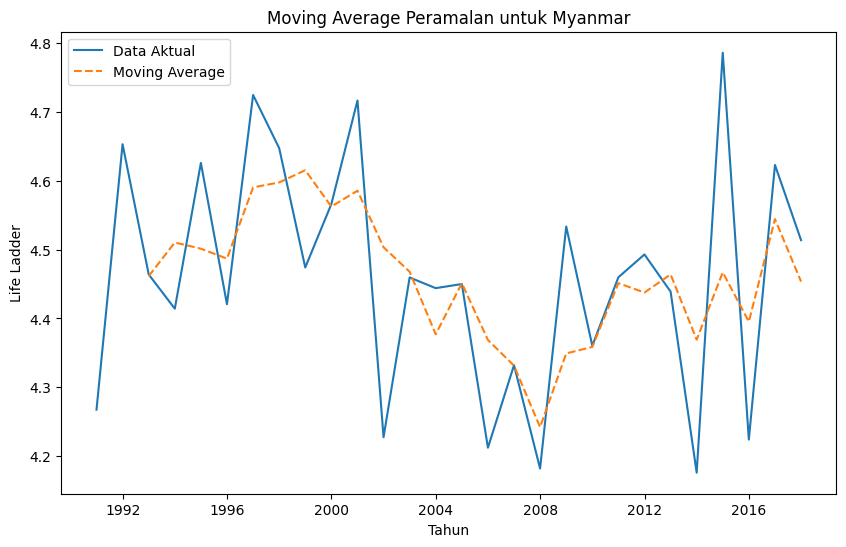

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(myan_list), freq='Y')
life_ladder_series = pd.Series(myan_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Myanmar')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

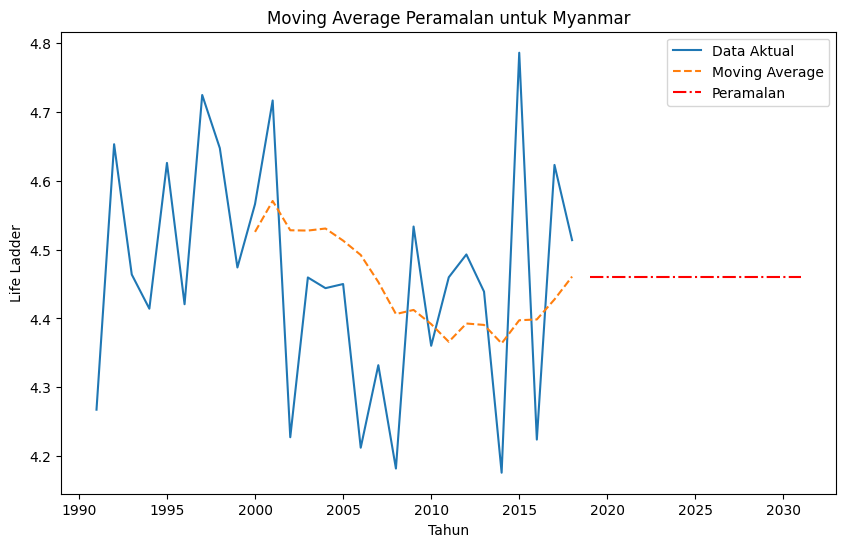

            forecast
year                
2018-12-31  4.460815
2019-12-31  4.460815
2020-12-31  4.460815
2021-12-31  4.460815
2022-12-31  4.460815
2023-12-31  4.460815
2024-12-31  4.460815
2025-12-31  4.460815
2026-12-31  4.460815
2027-12-31  4.460815
2028-12-31  4.460815
2029-12-31  4.460815
2030-12-31  4.460815


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(myan_list), freq='Y')
life_ladder_series = pd.Series(myan_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Myanmar')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

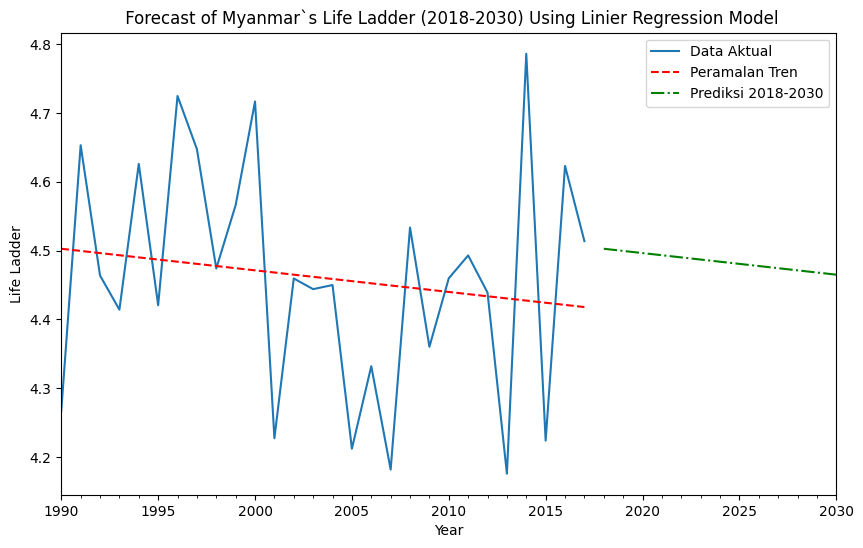

2018-12-31    4.502718
2019-12-31    4.499578
2020-12-31    4.496438
2021-12-31    4.493299
2022-12-31    4.490159
2023-12-31    4.487020
2024-12-31    4.483880
2025-12-31    4.480741
2026-12-31    4.477601
2027-12-31    4.474462
2028-12-31    4.471322
2029-12-31    4.468183
2030-12-31    4.465043
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(myan_list), freq='Y')
life_ladder_series = pd.Series(myan_list, index=years, name='Life_Ladder')

# Menambahkan tren
myan_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
myan_lm = sm.OLS(myan_df['Life_Ladder'], myan_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = myan_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title=' Forecast of Myanmar`s Life Ladder (2018-2030) Using Linier Regression Model')
myan_lm.predict(myan_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)

forecast_values.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\myanmar_for_lr.xlsx", index=False)


### ARIMA

Forecast for Myanmar's Life Ladder (2018-2030):
            forecast
2018-12-31  4.490302
2019-12-31  4.502737
2020-12-31  4.496150
2021-12-31  4.499639
2022-12-31  4.497791
2023-12-31  4.498770
2024-12-31  4.498252
2025-12-31  4.498526
2026-12-31  4.498381
2027-12-31  4.498458
2028-12-31  4.498417
2029-12-31  4.498439
2030-12-31  4.498427


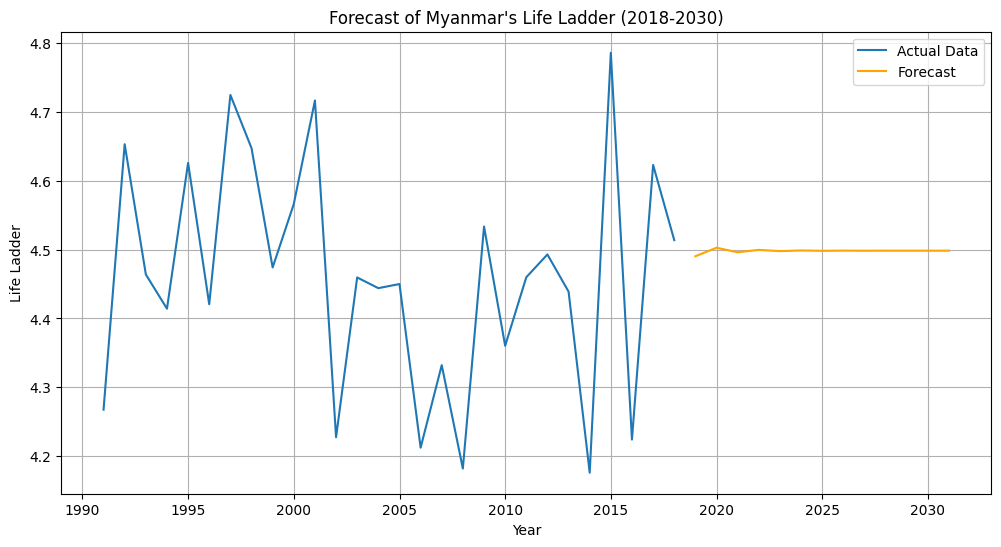

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(myan_list), freq='Y')
life_ladder_series = pd.Series(myan_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Myanmar's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Myanmar's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
myan_df_new = pd.DataFrame({'Life_Ladder': myan_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = myan_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = myan_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [14]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
myan_df['Moving Average'] = myan_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = myan_df['Life_Ladder']
ma_forecast = myan_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [15]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[4.51813385 4.46212821 4.52163421 4.47612962 4.54963703 4.5076328
 4.49013103 4.47262927 4.51113315]
[4.60118708 4.61099987 4.62081266 4.63062545 4.64043824 4.65025103
 4.66006382 4.66987661 4.67968941]
[4.56805584 4.52637272 4.51528899 4.51234177 4.51155809 4.51134971
 4.5112943  4.51127957 4.51127565]
1998-12-31    4.615469
1999-12-31    4.562586
2000-12-31    4.585674
2001-12-31    4.503415
2002-12-31    4.467873
2003-12-31    4.376929
2004-12-31    4.451172
2005-12-31    4.368677
2006-12-31    4.331355
2007-12-31    4.241942
2008-12-31    4.349116
2009-12-31    4.358507
2010-12-31    4.451190
2011-12-31    4.437659
2012-12-31    4.463907
2013-12-31    4.369198
2014-12-31    4.466952
2015-12-31    4.395255
2016-12-31    4.544405
2017-12-31    4.453581
Freq: A-DEC, Name: Moving Average, dtype: float64


In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.270234  6.293395  0.308041
1  Linier Regresion  0.145236  3.408363  0.188700
2    Moving Average  0.093266  2.087034  0.126715
3             ARIMA  0.149665  3.518988  0.197326


In [17]:
print(myan_list)

[4.267320554507203, 4.653234988416263, 4.463843535009878, 4.4141184379255, 4.626068342527787, 4.420613578916544, 4.724815469823922, 4.647559096768807, 4.474033156091873, 4.566165251571211, 4.716823218541148, 4.227257850751216, 4.459539374199723, 4.443988685529047, 4.449988689523805, 4.212054117666865, 4.332021873809429, 4.181749814758065, 4.533575021214186, 4.360195550132962, 4.459798313573547, 4.492982726846759, 4.438939571380615, 4.175670623779297, 4.786247253417969, 4.223846435546875, 4.623119831085205, 4.513777659293189]


In [18]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [4.360195550132962, 4.459798313573547, 4.492982726846759, 4.438939571380615, 4.175670623779297, 4.786247253417969, 4.223846435546875, 4.623119831085205, 4.513777659293189]
ses_forecast = [4.60118708, 4.61099987, 4.62081266, 4.63062545, 4.64043824, 4.65025103, 4.66006382, 4.66987661, 4.67968941]
ma_forecast = [ 4.358507, 4.451190, 4.437659, 4.463907, 4.369198, 4.466952, 4.395255, 4.544405, 4.453581]
lr_forecast = [4.51813385, 4.46212821, 4.52163421, 4.47612962, 4.54963703, 4.5076328, 4.49013103, 4.47262927, 4.51113315]
arima_forecast = [4.56805584, 4.52637272, 4.51528899, 4.51234177, 4.51155809, 4.51134971, 4.5112943, 4.51127957, 4.51127565]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,4.360196,4.601187,4.518134,4.358507,4.568056
1,2010-12-31,4.459798,4.611000,4.462128,4.451190,4.526373
2,2011-12-31,4.492983,4.620813,4.521634,4.437659,4.515289
3,2012-12-31,4.438940,4.630625,4.476130,4.463907,4.512342
4,2013-12-31,4.175671,4.640438,4.549637,4.369198,4.511558
5,2014-12-31,4.786247,4.650251,4.507633,4.466952,4.511350
6,2015-12-31,4.223846,4.660064,4.490131,4.395255,4.511294
7,2016-12-31,4.623120,4.669877,4.472629,4.544405,4.511280
8,2017-12-31,4.513778,4.679689,4.511133,4.453581,4.511276
